# **Kegiatan Modul 3**

**Poin penilaian :**

* Tingkat kesesuaian code
* Tingkat kesesuaian output
* Kesesuaian step preprocessing dan pemodelan
* Kesesuaian jawaban dengan konten materi modul
* Pemahaman materi tentang Dropout dan BatchNormalization
* Dapat menerapkan semua konten materi dalam modul-modul sebelumnya
* Kerapian kode program
* Tidak ada error
* Nilai Maksimal 100 poin

## **Introduction**

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

## **Get Your Dataset**

* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Untuk selanjutnya pahami code dibawah dengan baik.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/RESEARCH CENTER/DATASETS"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS/

/content/drive/My Drive/RESEARCH CENTER/DATASETS


Cek apakah api sudah terbaca oleh sistem

In [ ]:
# Cek apakah api sudah terbaca oleh sistem
from google.colab import files
!ls  
files.upload()

kaggle.json  README_rpc-cv-images.txt  rps-cv-images  test   validation
paper	     rock		       scissors       train


{}

* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 94% 289M/306M [00:02<00:00, 131MB/s]
100% 306M/306M [00:02<00:00, 123MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  paper		       rock	      scissors	train
modul3.h5    README_rpc-cv-images.txt  rps-cv-images  test	validation


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
# Cek isi direktori kerja untuk memastikan dataset telah berhasil diekstrak.
!ls

kaggle.json  paper  README_rpc-cv-images.txt  rock  rps-cv-images  scissors


## **Prepare Your Data**

### **Soal 1** 
poin 5

---
Terlihat disana bahwa ada file dan folder baru yaitu : `paper, rock, scissors, README_rpc-cv-images.txt`. Untuk tujuan mempermudah aksesabilitas dataset maka akan lebih baik semua folder dataset yang merepresentasikan kelasnya tersebut disimpan dalam satu folder bernama `dataset`. Tugas anda adalah membuat folder baru dan memindahkan semua folder tersebut folder `dataset`.

Selanjutnya, anda akan ditugaskan untuk melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val` oleh sebab itu anda perlu tempat khusus untuk menyimpan ketiga folder tersebut agar penyimpanan anda lebih rapi. Buatlah sebuah folder baru bernama `rockpaperscissors` dan masukkan folder `dataset` kedalamnya. Nanti kita juga akan menyimpan folder `train, test, val` kedalam folder `rockpaperscissors`.

*Ingat google colab juga menerima command berbasis linux.*

In [ ]:
# TULIS CODE ANDA DISINI
%cd /content/drive/My Drive/RESEARCH CENTER
!ls

/content/drive/My Drive/RESEARCH CENTER
DATASETS


### **Soal 2**  *Opsional*

poin 15

---
Sebelum dataset siap untuk dilakukan proses training anda perlu melakukan splitting dataset menjadi 3 bagian yaitu `train, test, val`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

* nilai full hanya untuk praktikan yang mampu menerapkan 2 baris code untuk splitting dataset

In [ ]:
# TULIS CODE ANDA DISINI
os.mkdir("DATASETS/train")
os.mkdir("DATASETS/train/rock")
os.mkdir("DATASETS/train/paper")
os.mkdir("DATASETS/train/scissors")
os.mkdir("DATASETS/test")
os.mkdir("DATASETS/test/rock")
os.mkdir("DATASETS/test/paper")
os.mkdir("DATASETS/test/scissors")
os.mkdir("DATASETS/validation")
os.mkdir("DATASETS/validation/rock")
os.mkdir("DATASETS/validation/paper")
os.mkdir("DATASETS/validation/scissors")

In [ ]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/validation/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [ ]:
# TULIS CODE ANDA DISINI
import shutil, os, glob

base_dataset = "DATASETS/train"
class_dir = ['rock','paper','scissors']
for class_item in class_dir:
    X = []
    Y = []
    locate = class_item
    cur_dir = base_dataset+"/"+class_item
    dataset = os.listdir(cur_dir)
    train_len_func = int(80/100*len(dataset))
    
    srcDir = base_dataset + "/" + locate
    dstDir_train = 'DATASETS/train/' + locate.lower()
    dstDir_val = 'DATASETS/test/' + locate.lower()
    for item in dataset:
        if len(X) < train_len_func:
            X.append(item)
            shutil.move(srcDir + '/' + item, dstDir_train + '/' + item);
        else:
            Y.append(item)
            shutil.move(srcDir + '/' + item, dstDir_val + '/' + item);
    



In [ ]:
%cd /content/drive/My Drive/RESEARCH CENTER/DATASETS

/content/drive/My Drive/RESEARCH CENTER/DATASETS


In [ ]:
!ls

kaggle.json  paper		       rock	      scissors	train
modul3.h5    README_rpc-cv-images.txt  rps-cv-images  test	validation


In [ ]:
import os

train_dir = 'train'
validation_dir = 'validation'
test_dir = 'test'

train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')

#penamaan variabel data rok paper dll 

In [ ]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

print('\ntotal validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

print('\ntotal test rock images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissors images:', len(os.listdir(test_scissors_dir)))

total training rock images: 464
total training paper images: 455
total training scissors images: 480

total validation rock images: 146
total validation paper images: 143
total validation scissors images: 150

total test rock images: 116
total test paper images: 114
total test scissors images: 120


Bila anda melakukannya dengan benar, maka ketika anda menjalankan perintah dibawah anda akan menemui output sbb :

**Output perintah `!ls`**
```
 bbc_document_classification	  kaggle.json
 big_mart_sales_forcasting	  model.png
 Bird_Type			  monkey_labels.txt
 BRAIN_TUMOR			  Monkey_Species
 cats_and_dogs_filtered		  PetImages
 dataset			  README_rpc-cv-images.txt
 Diabetics_Retinopathy		  Rice_Disease
 DS_CHEAT_SHEET			  rockpaperscissors
 imdb_indonesian_movies_2.csv	  rps-cv-images
'Kaggle Download Dataset.ipynb'
```

**Output perintah `!ls rockpaperscissors`**
```
 dataset
```
**Output perintah `!ls rockpaperscissors`**
```
 paper  rock  scissors
```



In [ ]:
# TULIS CODE ANDA DISINI

Splitting dataset berhasil apabila dijalankan perintah `ls rockpaperscissors` maka akan menampilkan output seperti dibawah ini:

```
# dataset/  test/  train/  val/
```



## **Data Preprocessing**

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit pengolahan data. Kita perlu melakukan load dataset yang tersimpan dalam folder-folder kelas menggunakan generator dan melakukan sedikit proses augmentasi sederhana. 


**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

### **Soal 3**
poin 20

---

Lakukan proses agumentasi sederhana dan setting dataset menggunakan generator dengan ketentuan **WAJIB** menyertakan proses berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.


In [ ]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
train_path = "train"
test_path  = "test"
val_path   = "validation"

In [ ]:
# TULIS KODE ANDA DISINI
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(  train_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = True)

Found 1399 images belonging to 3 classes.


In [ ]:
validation_set = val_datagen.flow_from_directory(    val_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 439 images belonging to 3 classes.


In [ ]:
test_set = val_datagen.flow_from_directory(         test_path,
                                       target_size=(128, 128),
                                             color_mode="rgb",
                                                batch_size=32,
                                     class_mode='categorical',
                                               shuffle = False)

Found 350 images belonging to 3 classes.


## **Definisikan Model CNN**

Sangat disarankan menggunakan GPU sebagai akselerator untuk mempercepat proses training. Oleh sebab itu akan sangat lebih baik bila menggunakan google colab dimana anda dapat meminjam GPU dari google secara gratis.

### **Soal 4**
poin 60

---

Definisikan model CNN anda sebaik mungkin, model dan evaluasi yang anda bangun **WAJIB** memenuhi kriteria berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix

Bila anda telah melaksanakan semua item-item wajib diatas maka anda bisa mendapatkan penilaian yang sesuai dengan kriteria penilaian sbb: ***Bila tidak menerapkan salah satu dari item wajib maka penilaian di soal ini dianggap gugur***

* Akurasi < 50% Nilai Max 20
* Akurasi < 80% Nilai Max 30
* Akurasi >= 80% Nilai Max 40

Opsional untuk mendapatkan nilai tambah :
* Menggunakan Callbacks  **Poin tambahan 5 poin**
* Menggunakan Learning Rate  **Poin tambahan 5 poin**
* Lakukan prediksi dengan data test, pastikan model anda dapat memprediksi unseen data dengan kelas yang benar ***dengan ketentuan dapat menampilkan gambar dan label prediksi dan probability score dari gambar yang diprediksikan***. **Poin tambahan 15 poin**
* **Nilai tambahan 15 poin** apabila lama proses training model tidak lebih dari 15 menit dengan akurasi >90%

In [ ]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# DEFINISIKAN MODEL ANDA DISINI
model = Sequential()

model.add(InputLayer(input_shape=[128,128,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=3, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)       

In [ ]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# TULIS CODE UNTUK TRAINING DISINI
import time

start = time.time()
H = model.fit_generator(
        training_set,
        steps_per_epoch=44,
        epochs=20,
        validation_data=validation_set,
        validation_steps=5)

Epoch 1/20
44/44 [==============================] - 9s 204ms/step - loss: 0.9142 - acc: 0.5111 - val_loss: 148.9388 - val_acc: 0.1063
Epoch 2/20
44/44 [==============================] - 9s 199ms/step - loss: 0.7836 - acc: 0.6047 - val_loss: 9.1346 - val_acc: 0.1063
Epoch 3/20
44/44 [==============================] - 9s 200ms/step - loss: 0.6001 - acc: 0.7477 - val_loss: 5.1755 - val_acc: 0.1063
Epoch 4/20
44/44 [==============================] - 9s 197ms/step - loss: 0.5261 - acc: 0.7984 - val_loss: 0.8822 - val_acc: 0.6938
Epoch 5/20
44/44 [==============================] - 9s 200ms/step - loss: 0.5048 - acc: 0.8020 - val_loss: 4.3379 - val_acc: 0.1875
Epoch 6/20
44/44 [==============================] - 9s 202ms/step - loss: 0.5507 - acc: 0.7770 - val_loss: 2.0253 - val_acc: 0.2188
Epoch 7/20
44/44 [==============================] - 9s 200ms/step - loss: 0.4727 - acc: 0.8163 - val_loss: 1.0566 - val_acc: 0.7625
Epoch 8/20
44/44 [==============================] - 9s 198ms/step - loss: 

In [ ]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI
print("waktu = ", time.time() - start, "detik")

waktu =  220.23010754585266 detik


In [ ]:
from keras.models import save_model
model = save_model(model,'modul3.h5')

In [ ]:
!ls

kaggle.json  paper		       rock	      scissors	train
modul3.h5    README_rpc-cv-images.txt  rps-cv-images  test	validation


# **Evaluate**

In [ ]:
# TULIS CODE UNTUK EVALUASI MODEL DISINI

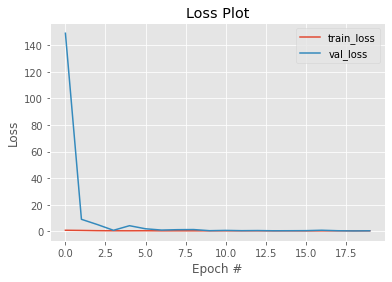

In [ ]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

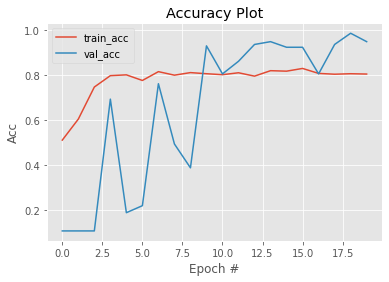

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

test/rock/eJ5fbY23rZWUULxO.png
Predicted: rock
 
test/rock/fiivFS9iUjynQIB5.png
Predicted: rock
 
test/rock/fK7m8vZQS1RUHcMr.png
Predicted: rock
 
test/rock/gIuYTYdTVKnNAc5m.png
Predicted: rock
 
test/rock/fjPydEfNWCvgobYu.png
Predicted: rock
 
test/rock/eHSa1nP8bmRToqyG.png
Predicted: rock
 
test/rock/gjdBDXv7avQwgTr3.png
Predicted: rock
 
test/rock/fGaDsQT8mUTaytaT.png
Predicted: rock
 
test/rock/evxvBwQgL8Kvv67C.png
Predicted: rock
 
test/rock/dZ6rscIYTbmlwVZE.png
Predicted: rock
 
test/rock/eGm3dLnWBxRrjlJX.png
Predicted: rock
 
test/rock/fMQzh7RRM5fbtBiC.png
Predicted: rock
 
test/rock/gRiBjZUJv5LqQXYZ.png
Predicted: rock
 
test/rock/gPFCK0WnHem9uYEW.png
Predicted: rock
 
test/rock/fLFzQoErbCBRR6NM.png
Predicted: rock
 
test/rock/fsN97zyPFSfYwnsS.png
Predicted: rock
 
test/rock/g04l14MAwqQthuWW.png
Predicted: rock
 
test/rock/g9lqYZfHWUb3cm08.png
Predicted: rock
 
test/rock/foxUXc8WPRDAd6LM.png
Predicted: rock
 
test/rock/dnss2tOuxRmL0ZjZ.png
Predicted: rock
 
test/rock/fl3m2aXD9q

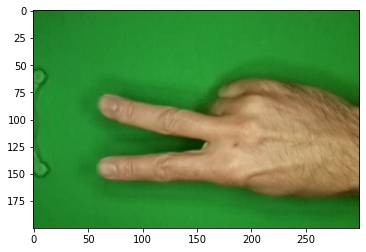

In [ ]:
# TULIS CODE UNTUK PREDIKSI DATA TEST DISINI
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

model_path = 'modul3.h5'
model_weights_path = 'weight.h5'
test_path = 'test'

model = load_model(model_path)

def predict(file):
  x = load_img(file, target_size=(128,128))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model.predict(x)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 1:
    print("Predicted: rock")
  elif answer == 0:
    print("Predicted: paper")
  elif answer == 2:
    print("Predicted: scissors")

  return answer

#Walk the directory for every image
for i, ret in enumerate(os.walk(test_path)):
  for i, filename in enumerate(ret[2]):
    if filename.startswith("."):
      continue
    
    print(ret[0] + '/' + filename)
    img = mpimg.imread(ret[0] + '/' + filename)
    plt.imshow(img)
    result = predict(ret[0] + '/' + filename)
    print(" ")